## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
# 關閉 FutureWarning 的警告
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# wine ==> 分類 ==> Logistic Regression

The wine dataset is a classic and very easy multi-class classification dataset.<br>
refer : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [3]:
wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


# boston ==> 回歸 ==> Linear Regression
Load and return the boston house-prices dataset (regression).<br>
refer : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [4]:
boston = datasets.load_boston()
print('Original Shape : ',boston.data.shape)   # 有 13 個 feature

Original Shape :  (506, 13)


New Shape :  (506, 1)
Coefficients:  [-0.94532598]
Mean squared error: 35.54


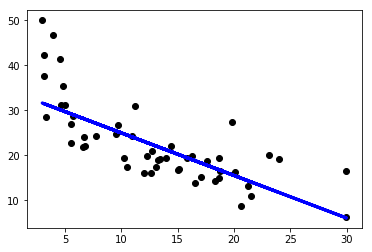

In [5]:
X = boston.data[:, np.newaxis, 12]   # 此處只取一個 feature (column)
print('New Shape : ',X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### 13 種 features 的圖表一起顯示

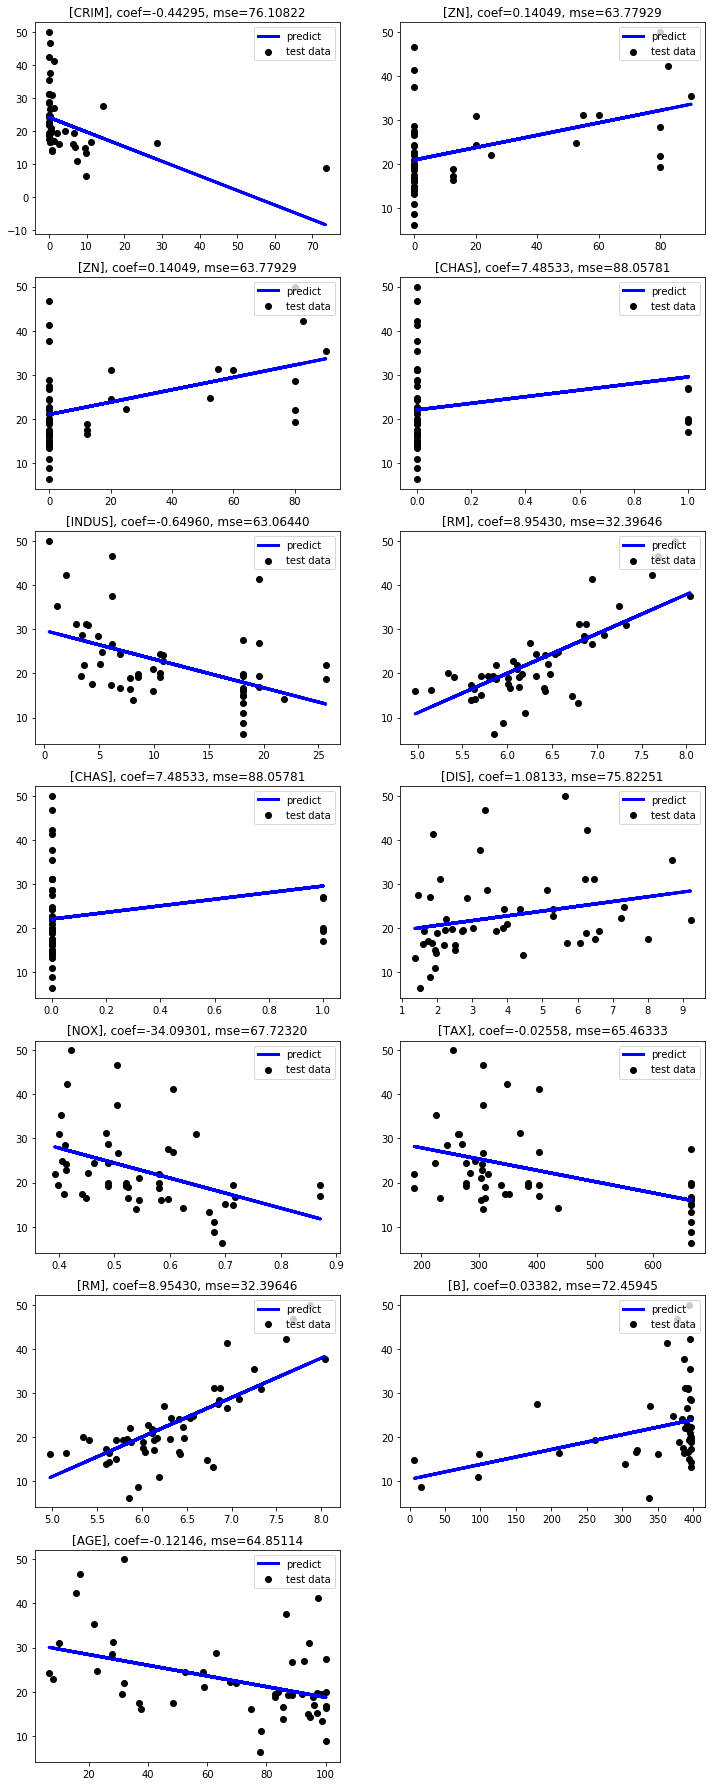

In [6]:
columns = 2
rows = 7

# figsize=(寬度英吋,高度英吋)
f, axarr = plt.subplots(rows, columns, figsize=(12, 32))

for c in range(0, columns):
    for r in range(0, rows):
        index = (c+1)*(r+1)-1;
        if (index==13):
            break
    
        X = boston.data[:, np.newaxis, index]   # 此處只取一個 feature (column)

        x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        
        axarr[r, c].scatter(x_test, y_test,  color='black', label='test data')
        axarr[r, c].plot(x_test, y_pred, color='blue', linewidth=3, label='predict')
        axarr[r, c].legend(loc='upper right')
        
        coef = '%.5f' %regr.coef_
        mse = '%.5f' %(mean_squared_error(y_test, y_pred))
        title='['+boston.feature_names[index]+'], coef='+str(coef)+', mse='+str(mse)
        axarr[r, c].set_title(title)

f.delaxes(axarr[rows-1, columns-1])    # 刪掉最後一個沒有用到的 (因為總共 13 個圖, 是單數)